In [45]:
import pandas as pd


In [18]:
df = pd.read_csv('full_grouped.csv')
df.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [15]:
df.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [19]:
df = df.loc[df['Confirmed'] > 0]

In [20]:
import seaborn as sns

%matplotlib inline

import matplotlib.pyplot as plt

<Axes: xlabel='WHO Region', ylabel='Confirmed'>

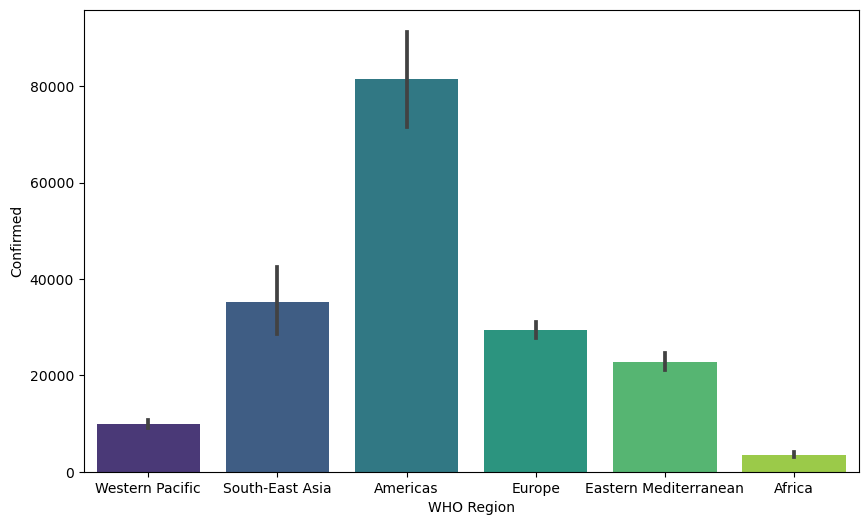

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'WHO Region', y = 'Confirmed', data=df, palette='viridis', saturation=0.8)


<Axes: xlabel='WHO Region', ylabel='Deaths'>

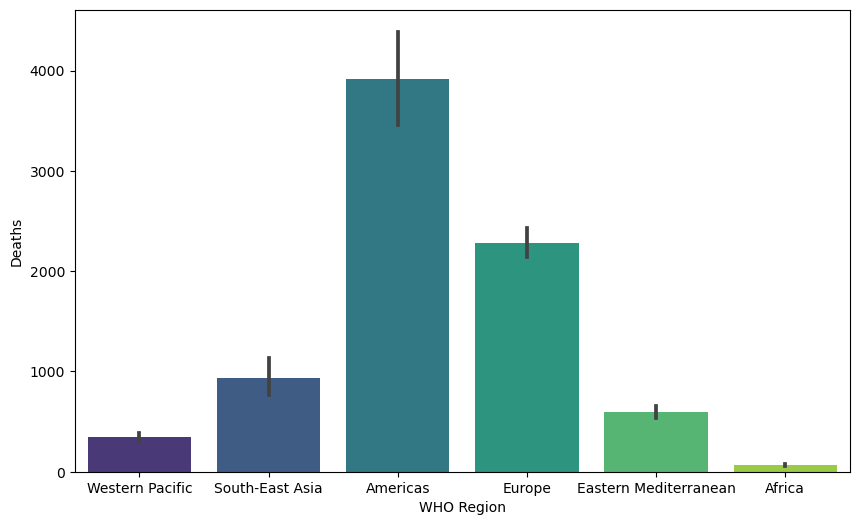

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'WHO Region', y = 'Deaths', data=df, palette='viridis', saturation=0.8)

In [22]:
df.rename(columns = {'Country/Region': 'Country'}, inplace = True)

In [23]:
WS_region = df.loc[df['WHO Region'] == 'Western Pacific']
WS_region

,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
36,2020-01-22,China,548,17,28,503,0,0,0,Western Pacific
87,2020-01-22,Japan,2,0,0,2,0,0,0,Western Pacific
155,2020-01-22,South Korea,1,0,0,1,0,0,0,Western Pacific
164,2020-01-22,Taiwan*,1,0,0,1,0,0,0,Western Pacific
223,2020-01-23,China,643,18,30,595,95,1,2,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
35102,2020-07-27,Philippines,82040,1945,26446,53649,1592,13,336,Western Pacific
35119,2020-07-27,Singapore,50838,27,45692,5119,469,0,171,Western Pacific
35124,2020-07-27,South Korea,14203,300,13007,896,28,1,102,Western Pacific
35133,2020-07-27,Taiwan*,462,7,440,15,4,0,0,Western Pacific


In [24]:
WS_region_deaths = WS_region.loc[WS_region['Deaths'] > 0]

<Axes: xlabel='Country', ylabel='Deaths'>

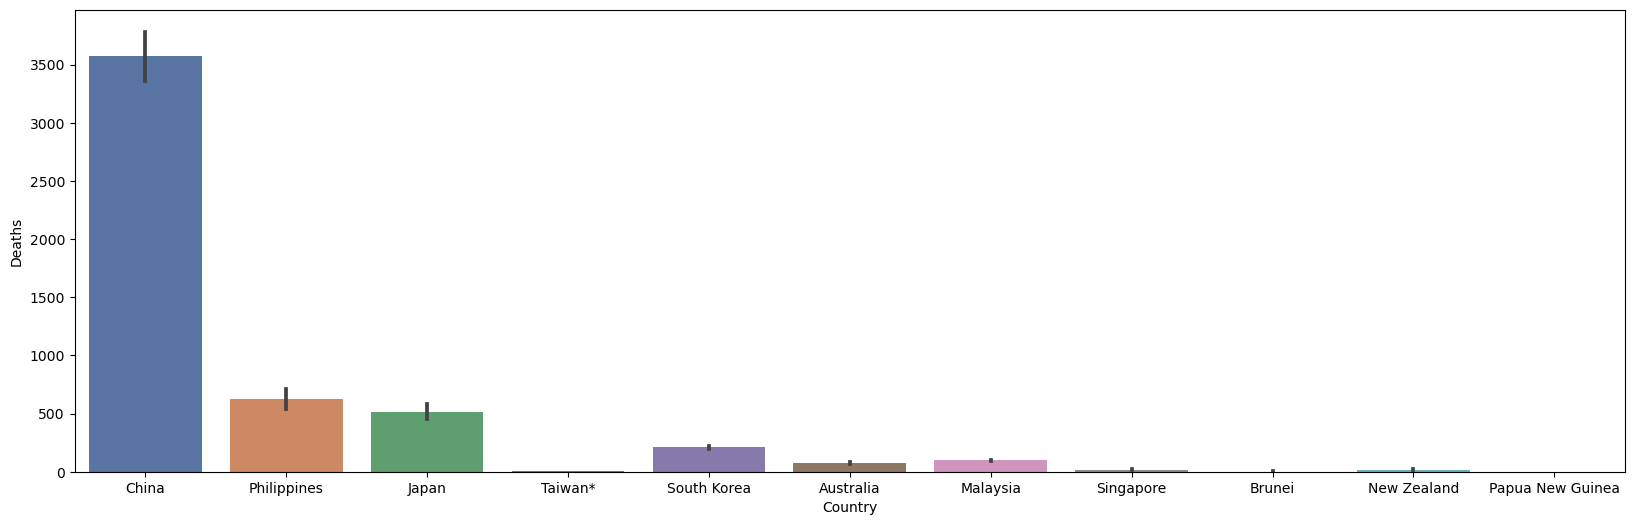

In [31]:
plt.figure(figsize=(20, 6))
sns.barplot(x = 'Country', y = 'Deaths', data=WS_region_deaths, palette='deep')

<Axes: xlabel='Country'>

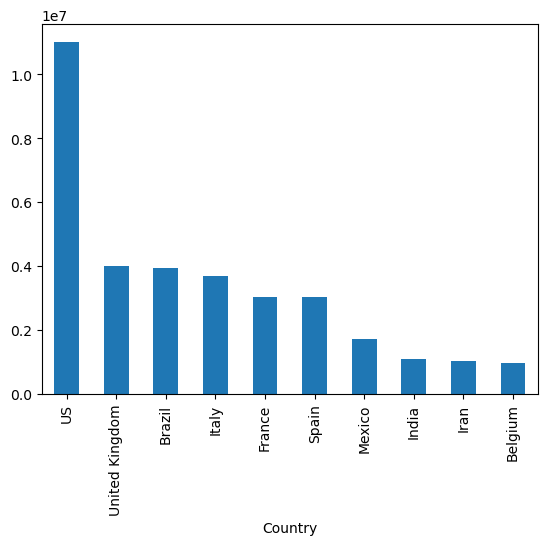

In [88]:
df_1 = df.groupby('Country')
df_2 = df_1['Deaths'].sum().sort_values(ascending = False).head(10)
df_2.plot(kind='bar')